# RPA Demonstration
## (Rev: 05/28/2019)

RPA Demo

This is a notebook designed to look at a paper that contained some 1D simulations.  The main reference of this work is the RPA paper by Yan et al, the full reference is:

Yan et al, Phys. Rev. Lett., ${\bf 100}$, 135003 (2008).

The goal of this paper is to demonstrate high intensity laser interaction using simple 1D simulations.  One recent paper which contained 1D simulations is the work by Yan et al which demonstrates the possibility of generating ions with small energy spread using circularly polarized laser.

In this case we will perform some 1D simulations using laser with normalized vector potential > 1 with different polarizations (both linear and circular) on a overdense plasma slab with very low thickness, and look at the evolution of the energetic ions under the influence of these lasers.

OSIRIS simulations are done in normalized units. 

* Time:  $t' = t \omega_{p}$

* Frequency: $\omega' = \frac{\omega}{\omega_{p}}$ 

* Position: $\vec{x}' = \frac{\omega_{p}}{c} \vec{x}$  

* Momenta: $\vec{u}' = \frac{\vec{p}}{m_{e} c} = \frac{\vec{\gamma v}}{c} = \frac{\vec{u}} {c}$  

* Electric field: $\vec{E}' = e \frac{c / \omega_{p}}{m_{e} c^2} \vec{E}$  

* Magnetic field: $\vec{B}' = e \frac{c / \omega_{p}}{m_{e} c^2} \vec{B}$  


In [20]:
# **********************************
# First Run This Cell to 
# import the necessary libraries
# **********************************
#
# Please run this cell before running anything, and run this cell again if you have restarted the 
# python kernel.
#
# This cell imports useful routines to diagnose the simulations here
#

%matplotlib inline
import osiris
from osiris import tajima
from rpa_helper import *
import numpy as np
import matplotlib.pyplot as plt
from osh5vis import osplot
from osh5io import *
from osh5utils import fft
from ipywidgets import interact_manual,Layout,interact, FloatSlider
import ipywidgets as widgets
interact_calc=interact_manual.options(manual_name="Make New Input and Run")

## Here we illustrate and explore the OSIRIS pulse shape

In [12]:
# This cell shows the laser envelope shape for given t_rise, t_fall, and Lt.  
#
interact(laser_envelope, trise=FloatSlider(min=0.00, max=5, step=.05, description='$t_{rise}$', value = 1.57),
         tflat=FloatSlider(min=0.00, max=5, step=.05, description='$Lt$', value = 0),
         tfall=FloatSlider(min=0.00, max=5, step=.05, description='$t_{fall}$', value = 1.57));

interactive(children=(FloatSlider(value=1.57, description='$t_{rise}$', max=5.0, step=0.05), FloatSlider(value…

### Below is a simulation using a circularly polarized light, like those in the paper.

In [18]:
## Hit <shift>+<return> to run case A

dirname = 'yan-circ'
osiris.runosiris(rundir=dirname,inputfile='yan-circ.txt')
# plot_maxgamma_t(dirname)

runosiris completed normally


Run the next cell to look at the results of the simulation. Click along the slider to see later timesteps. 

In [19]:
## Hit <shift>+<return> to visualize case A

dirname = './yan-circ'
rpa_movie(rundir=dirname)

interactive(children=(IntSlider(value=0, description='file_no', max=945, step=5), Output()), _dom_classes=('wi…

### Below is a simulation using a linearly polarized light.  

In [14]:
## Hit <shift>+<return> to run case A

dirname = 'yan-lin'
osiris.runosiris(rundir=dirname,inputfile='yan-lin.txt')
# plot_maxgamma_t(dirname)

runosiris completed normally


In [21]:
## Hit <shift>+<return> to visualize case A

dirname = './yan-lin'
rpa_movie(rundir=dirname)

interactive(children=(IntSlider(value=0, description='file_no', max=1470, step=5), Output()), _dom_classes=('w…

## Simulation Sandbox

The cell below allows the user to change the simulation parameters in a very limited and controlled setting to explore the RPA problem using OSIRIS.  Below I am showing a widget we developed for a different problem (LWFA, or Tajima/Dawson).

In [3]:
## Hit <shift>+<return> to start the widget, which contains a interface to change OSIRIS parameters

tajima_moving_widget()

interactive(children=(Text(value='casea-moving-24.txt', description='Template Input File:', layout=Layout(widt…

1.47
25.47
(35, 1600)
1.47
25.47
(35, 1600)


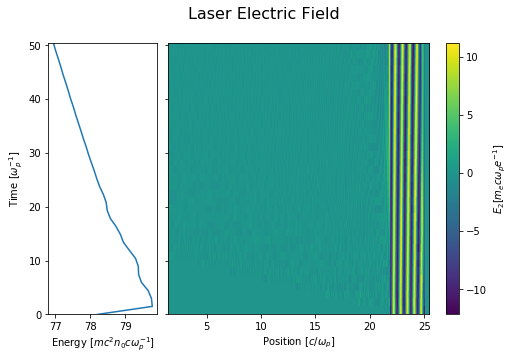

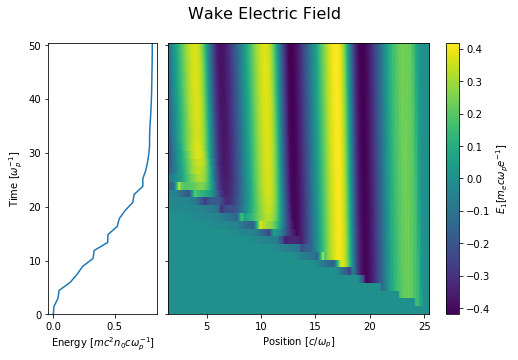

In [4]:
dirname = './case1-moving'
xt_and_energy_plot(rundir=dirname, field = 'e2')
xt_and_energy_plot(rundir=dirname, field = 'e1')